In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from pickle import dump
import warnings
warnings.filterwarnings("ignore")

In [2]:
world_df = pd.read_excel('world_development_mesurement.xlsx')
world_df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0             0.035               $60              NaN                  0.034   
1             0.034               $22              NaN                  0.128   
2             0.043               $15              NaN                  0.090   
3             0.047              $152              NaN                  0.054   
4             0.051               $12              NaN                  0.096   

   Internet Usage  Lending Interest  Life Expectancy Female  \
0             0.0             0.100                    71.0   
1             0.0             1.032                    47.0   
2             0.0               NaN                    57.0   
3             0.0             0.155                    52.0   
4             0.0               NaN                    52.0   

   Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                  67.0                 0.0                  1   
1                  44.0                 0.0                  1   
2                  53.0                 0.0                  1   
3                  49.0                 0.1                  1   
4                  49.0                 0.0                  1   

   Population 0-14  Population 15-64  Population 65+  Population Total  \
0            0.342             0.619           0.039          31719449   
1            0.476             0.499           0.025          13924930   
2            0.454             0.517           0.029           6949366   
3            0.383             0.587           0.029           1755375   
4            0.468             0.505           0.028          11607944   

   Population Urban Tourism Inbound Tourism Outbound  
0             0.599    $102,000,000     $193,000,000  
1             0.324     $34,000,000     $146,000,000  
2             0.383     $77,000,000      $50,000,000  
3             0.532    $227,000,000     $209,000,000  
4             0.178     $23,000,000      $30,000,000

In [3]:
world_df.shape

(2704, 25)

# Data preprocessing

# checking for data types: the columns below should be converted into float for further analysis :

# Business Tax Rate,GDP,Health Exp/Capita,Tourism Inbound,Tourism Outbound

In [4]:
world_df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [5]:
world_df.replace(['Bahamas, The','Bolivia','Congo, Dem. Rep.','Congo, Rep.',"Cote d'Ivoire","Curacao","Czech Republic","Egypt, Arab Rep.","Faeroe Islands","Gambia, The","Hong Kong SAR, China","Iran, Islamic Rep.","Korea, Dem. Rep.","Korea, Rep.","Kyrgyz Republic","Lao PDR","Macao SAR, China","Moldova","Slovak Republic","St. Kitts and Nevis","St. Lucia","St. Martin (French part)","St. Vincent and the Grenadines","Swaziland","Tanzania","Venezuela, RB","Vietnam","Virgin Islands (U.S.)","Yemen, Rep.",'Micronesia, Fed. Sts.','Turkey','United Kingdom','United States','Macedonia, FYR'],
               ['Bahamas','Bolivia, Plurinational State of','Congo, Democratic Republic of the','Congo',"Côte d'Ivoire",'Curaçao','Czechia','Egypt','Faroe Islands','Gambia','Hong Kong','Iran, Islamic Republic of',"Korea, Democratic People's Republic of",'Korea, Republic of','Kyrgyzstan',"Lao People's Democratic Republic",'Macao','Moldova, Republic of','Slovakia','Saint Kitts and Nevis','Saint Lucia','Saint Martin (French part)','Saint Vincent and the Grenadines','Eswatini','Tanzania, United Republic of','Venezuela, Bolivarian Republic of','Viet Nam','Virgin Islands, U.S.','Yemen','Micronesia, Federated States of','Türkiye','United Kingdom of Great Britain and Northern Ireland','United States of America','North Macedonia'],inplace=True)

must remove special characters from above mentioned columns to convert them into float

In [6]:
col = ['Business Tax Rate','GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']
for i in col:
    world_df[i] = world_df[i].str.replace('$','')
    world_df[i] = world_df[i].str.replace('%','')
    world_df[i] = world_df[i].str.replace(',','')
    world_df[i] = world_df[i].astype('float')

checking for null values : have to impute the outliers using any of the suitable technique

In [7]:
world_df.isna().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

before imputation let us check for outliers using boxplot

In [8]:
plt.rcParams['figure.figsize'] = (20,10)

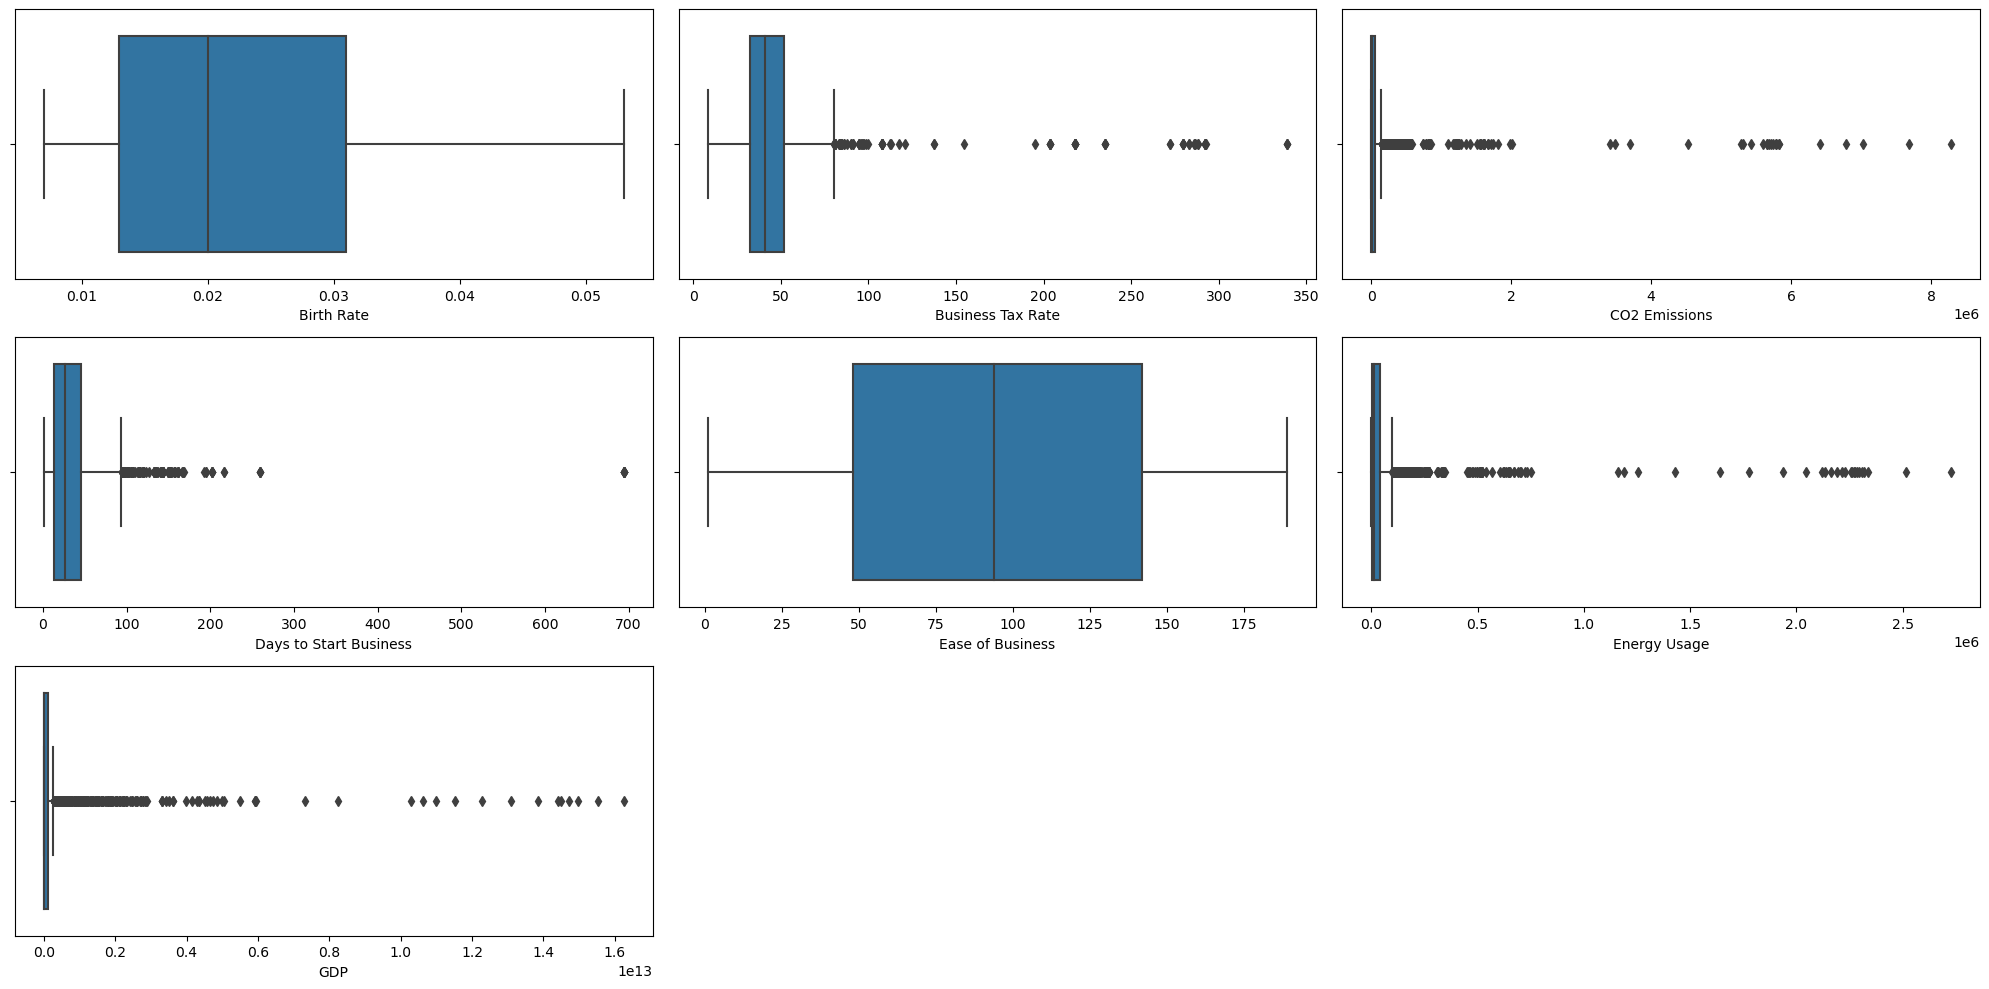

In [9]:
plt.subplot(3,3,1)
sns.boxplot(world_df['Birth Rate'])
plt.subplot(3,3,2)
sns.boxplot(world_df['Business Tax Rate'])
plt.subplot(3,3,3)
sns.boxplot(world_df['CO2 Emissions'])
plt.subplot(3,3,4)
sns.boxplot(world_df['Days to Start Business'])
plt.subplot(3,3,5)
sns.boxplot(world_df['Ease of Business'])
plt.subplot(3,3,6)
sns.boxplot(world_df['Energy Usage'])
plt.subplot(3,3,7)
sns.boxplot(world_df['GDP'])
plt.tight_layout()
plt.show()

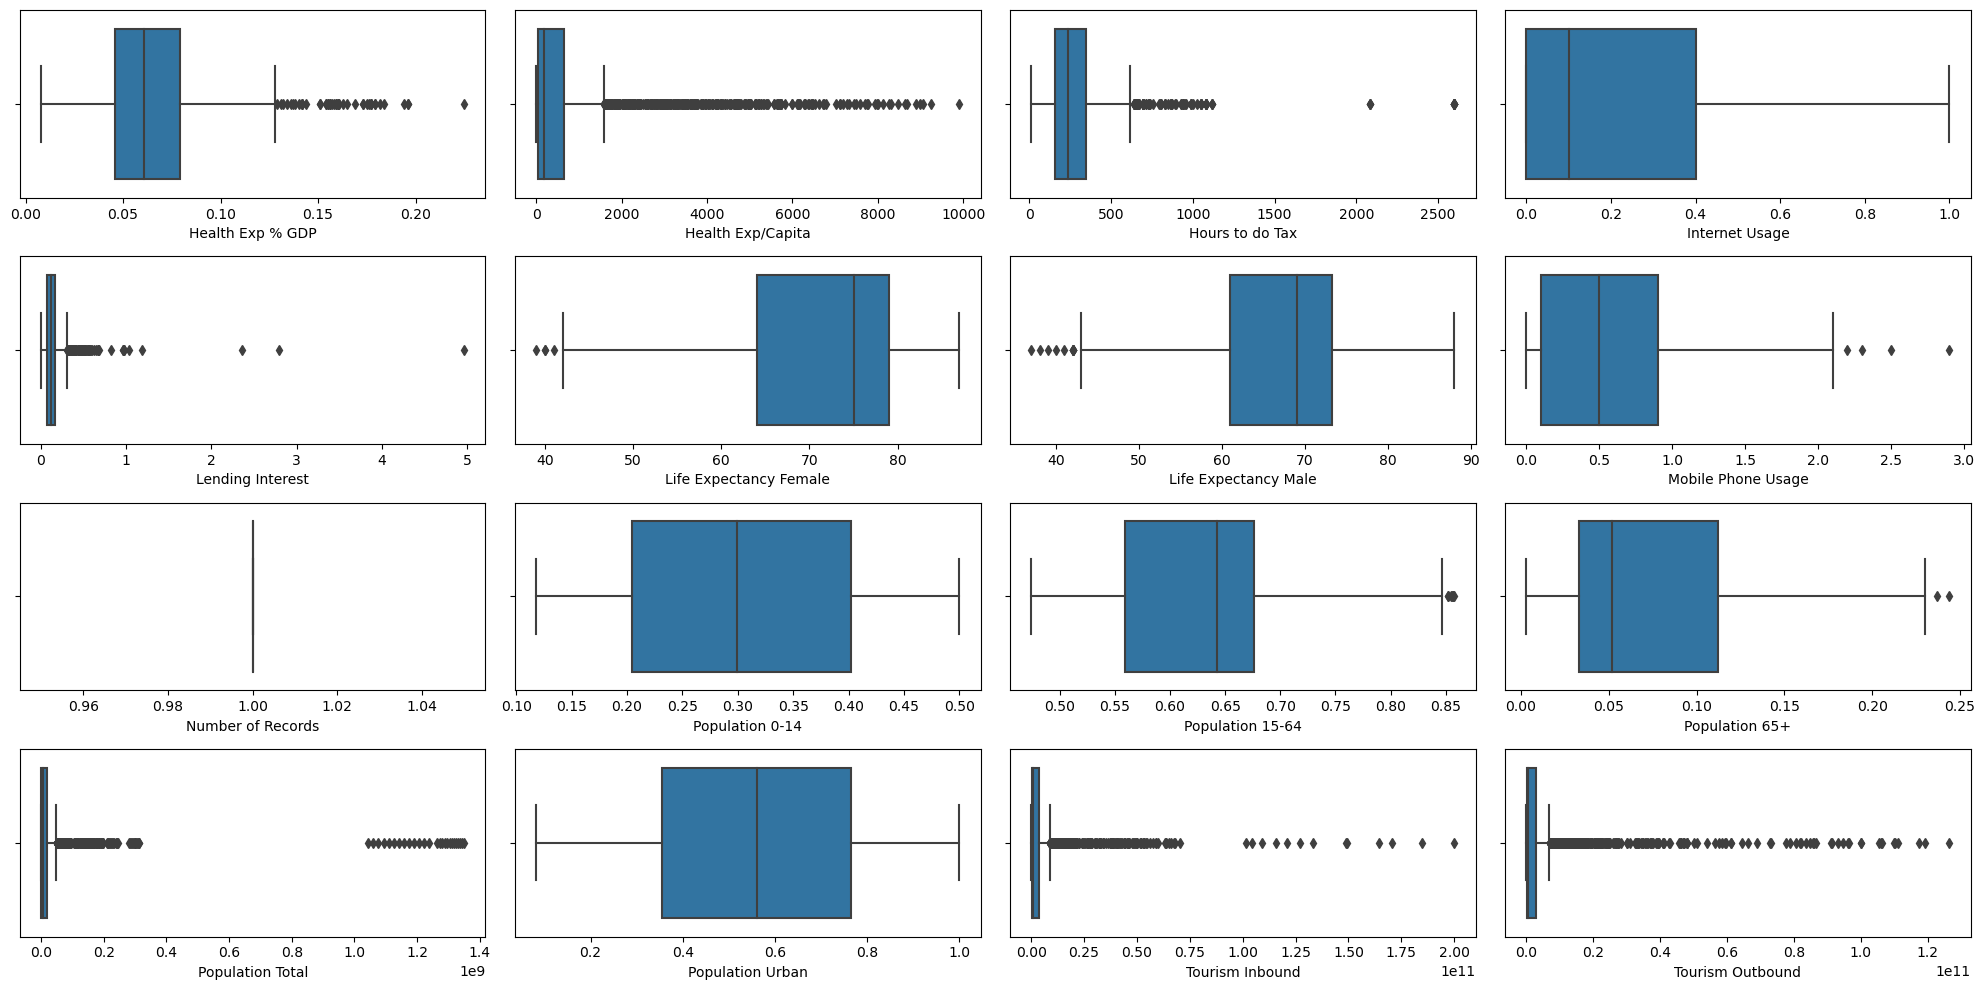

In [10]:
plt.subplot(4,4,1)
sns.boxplot(world_df['Health Exp % GDP'])
plt.subplot(4,4,2)
sns.boxplot(world_df['Health Exp/Capita'])
plt.subplot(4,4,3)
sns.boxplot(world_df['Hours to do Tax'])
plt.subplot(4,4,4)
sns.boxplot(world_df['Internet Usage'])
plt.subplot(4,4,5)
sns.boxplot(world_df['Lending Interest'])
plt.subplot(4,4,6)
sns.boxplot(world_df['Life Expectancy Female'])
plt.subplot(4,4,7)
sns.boxplot(world_df['Life Expectancy Male'])
plt.subplot(4,4,8)
sns.boxplot(world_df['Mobile Phone Usage'])
plt.subplot(4,4,9)
sns.boxplot(world_df['Number of Records'])
plt.subplot(4,4,10)
sns.boxplot(world_df['Population 0-14'])
plt.subplot(4,4,11)
sns.boxplot(world_df['Population 15-64'])
plt.subplot(4,4,12)
sns.boxplot(world_df['Population 65+'])
plt.subplot(4,4,13)
sns.boxplot(world_df['Population Total'])
plt.subplot(4,4,14)
sns.boxplot(world_df['Population Urban'])
plt.subplot(4,4,15)
sns.boxplot(world_df['Tourism Inbound'])
plt.subplot(4,4,16)
sns.boxplot(world_df['Tourism Outbound'])
plt.tight_layout()
plt.show()

# interpretations:

The boxplots of Birth Rate,Ease of Business ,Mobile Phone Usage,Internet Usage,Infant Mortality Rate,Life Expectancy Female,Life Expectancy Male,,Population 0-14,Population 15-64,Population 65+, Population Urban looks fine.

few outliers are detected but it make sense as it is global data and not much deviated from the actual values

max(Business Tax Rate) is around 340% , which means paying 340 rupees as tax for every 100 rupees profit. The global highest Business Tax Rate is around 55% , so assuming the max value to be 60% and replacing all the ouliers (i.e., above 60%) with np.nan and will fill them later using imputation techniques¶

max(Days to Start Business) is 694 days. Accounting 18-20 business days a month it takes like around 3 years , comparing it to real time global values the max time required to start a business is around 50 days.Based on the boxplot assuming the max days to start a business is 80 days and replacing all the outliers with np.nan and will figure a way to fill them up with sensible number later based on all other parameters¶

Based on the boxplot assuming 600 hours as max(hours to do tax ) and replacing all the outliers with np.nan and will figure a way to fill them up with sensible number later based on all other parameters¶

# drop Number of Records column

In [11]:
world_df.drop('Number of Records',axis = 1,inplace = True)

In [12]:
world_df['Business Tax Rate'] =np.where(world_df['Business Tax Rate']>60 ,np.nan,world_df['Business Tax Rate'])

In [13]:
world_df['Days to Start Business'] =np.where(world_df['Days to Start Business']>80 ,np.nan,world_df['Days to Start Business'])

In [14]:
world_df['Hours to do Tax'] =np.where(world_df['Hours to do Tax']>600 ,np.nan,world_df['Hours to do Tax'])

Removing outliers of the below feature makes no sense as the feature values are practically taken from the real world and depends on the population and gdp of the countries which varey significantly from one another

CO2 Emissions, Energy Usage, GDP, Health Exp/Capita, Population Total, Tourism Inbound, Tourism Outbound

lets apply log 10 transformation on the above columns to convert the left skewed data into normal distribution

In [15]:
c = ['CO2 Emissions','Energy Usage','GDP','Health Exp/Capita','Population Total','Tourism Inbound','Tourism Outbound']
for i in c:
    world_df[i] = np.log10(world_df[i])

In [16]:
world_df.rename({'CO2 Emissions':'log10_CO2 Emissions','Energy Usage':'log10_Energy Usage','GDP':'log10_GDP','Health Exp/Capita':'log10_Health Exp/Capita','Population Total':'log10_Population Total','Tourism Inbound':'log10_Tourism Inbound','Tourism Outbound':'log10_Tourism Outbound'},inplace = True,axis=1)

In [17]:
# looking for missing values 
world_df.isna().sum()

Birth Rate                  119
Business Tax Rate          1517
log10_CO2 Emissions         579
Country                       0
Days to Start Business     1160
Ease of Business           2519
log10_Energy Usage          919
log10_GDP                   210
Health Exp % GDP            309
log10_Health Exp/Capita     309
Hours to do Tax            1412
Infant Mortality Rate       260
Internet Usage              173
Lending Interest            824
Life Expectancy Female      136
Life Expectancy Male        136
Mobile Phone Usage          167
Population 0-14             220
Population 15-64            220
Population 65+              220
log10_Population Total        0
Population Urban             26
log10_Tourism Inbound       368
log10_Tourism Outbound      471
dtype: int64

We can use univariant methods to fill the missing values like mean , median or mode but may not provide an accurate result always so we use multivariant imputation technique, KNN imputer for computing missing values using k-Nearest Neighbors as in this approach, we specify distance as weight to predict the missing value.

In [18]:
world_features = ['Birth Rate', 'Business Tax Rate', 'log10_CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'log10_Energy Usage',
       'log10_GDP', 'Health Exp % GDP', 'log10_Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'log10_Population Total', 'Population Urban',
       'log10_Tourism Inbound', 'log10_Tourism Outbound']

In [19]:
world = world_df[world_features]

In [20]:
from sklearn.impute import KNNImputer
knn_impute = KNNImputer(n_neighbors=5,weights='distance')
k = knn_impute.fit_transform(world)

In [21]:
df = pd.DataFrame(k,columns=world_features)

In [22]:
df

Birth Rate  Business Tax Rate  log10_CO2 Emissions  \
0       0.020000          34.210915             4.944142   
1       0.050000          30.176688             3.979639   
2       0.043000          43.049035             3.208710   
3       0.027000          39.172187             3.631038   
4       0.046000          31.744738             3.017451   
5       0.042000          36.178327             2.478566   
6       0.041000          44.068212             3.535547   
7       0.039000          32.475816             2.428135   
8       0.051000          25.391484             2.245513   
9       0.039000          39.770536             1.924279   
10      0.048000          36.224438             3.216430   
11      0.039000          45.471353             3.020775   
12      0.038000          31.054154             3.831934   
13      0.030000          38.695584             2.605305   
14      0.025000          45.837202             5.150222   
15      0.040000          29.348008             2.658011   
16      0.040000          46.014475             2.784617   
17      0.044000          47.066232             3.765743   
18      0.034000          39.221728             3.022016   
19      0.045000          49.890202             2.439333   
20      0.035000          36.312584             3.798582   
21      0.042000          37.036014             3.107210   
22      0.042000          46.016521             2.167317   
23      0.039000          43.373812             4.017784   
24      0.031000          21.138229             2.565130   
25      0.043000          45.848903             2.639486   
26      0.022000          36.868293             4.673150   
27      0.041000          36.110231             3.272770   
28      0.045000          37.285802             2.957128   
29      0.048000          29.858644             2.734800   
30      0.038000          40.143475             3.092018   
31      0.017000          35.159857             3.442323   
32      0.022000          42.795291             4.530264   
33      0.044000          33.873451             3.130012   
34      0.032000          37.767510             3.215638   
35      0.053000          33.539583             2.900913   
36      0.043000          39.304338             4.898626   
37      0.041000          29.542448             2.836324   
38      0.036000          44.314385             1.681241   
39      0.040000          33.238304             3.595276   
40      0.019000          39.003404             2.752048   
41      0.044000          39.917678             2.628389   
42      0.049000          37.075577             2.713491   
43      0.024000          32.171390             5.566568   
44      0.043000          43.636513             2.583222   
45      0.040000          35.878739             3.743039   
46      0.033000          26.126880             3.074816   
47      0.042000          33.130430             3.423410   
48      0.039000          44.201806             3.132580   
49      0.017000          33.767183             4.299355   
50      0.048000          27.807285             3.185542   
51      0.045000          32.677251             3.259833   
52      0.032000          31.252595             4.142608   
53      0.050000          42.499038             2.892651   
54      0.013000          39.341899             3.539703   
55      0.015000          28.078177             4.469940   
56      0.027000          35.933828             4.445121   
57      0.028000          36.491499             2.602060   
58      0.023000          41.613525             3.814714   
59      0.028000          33.702161             3.296007   
60      0.014000          44.180297             6.532140   
61      0.012000          42.107973             3.656673   
62      0.008000          35.812987             4.607080   
63      0.026000          35.627376             6.074327   
64      0.022000          34.275930             5.420647   
65      0.009000          47.834329           

In [23]:
df = df.join(world_df['Country'])

In [24]:
length_unique_countries =len(df['Country'].unique())
length_unique_countries 

208

out of 2704 rows we have 208 different countries

Each country has 13 different rows (values) [208*13 = 2704]

assuming, 13 rows is the data of 13 years/decades of respective country

Giving weights to the data accordingly :

In [25]:
weight = [0.1,0.2,0.3,0.4,0.5,0.6,0.6,0.7,0.7,0.8,0.8,0.9,0.9]
weighted_mean = lambda x:np.average(x, weights=weight)

In [26]:
new_df = df.groupby(df['Country'])[['Birth Rate', 'Business Tax Rate', 'log10_CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'log10_Energy Usage',
       'log10_GDP', 'Health Exp % GDP', 'log10_Health Exp/Capita',
       'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'log10_Population Total', 'Population Urban',
       'log10_Tourism Inbound', 'log10_Tourism Outbound']].agg(weighted_mean).reset_index()

# feature engineering

1.converting column Population 0-14,Population 15-64,Population 65+ into single column Population 0-65+ and dropping the three columns

In [27]:
new_df['Population 0-65+'] = new_df[['Population 0-14','Population 15-64','Population 65+']].agg(sum , axis = 1)

In [28]:
new_df.drop(['Population 0-14','Population 15-64','Population 65+'],axis=1,inplace=True)

In [29]:
new_df['Population 0-65+'] = new_df['Population 0-65+'].round()

<AxesSubplot:xlabel='Population 0-65+', ylabel='Count'>

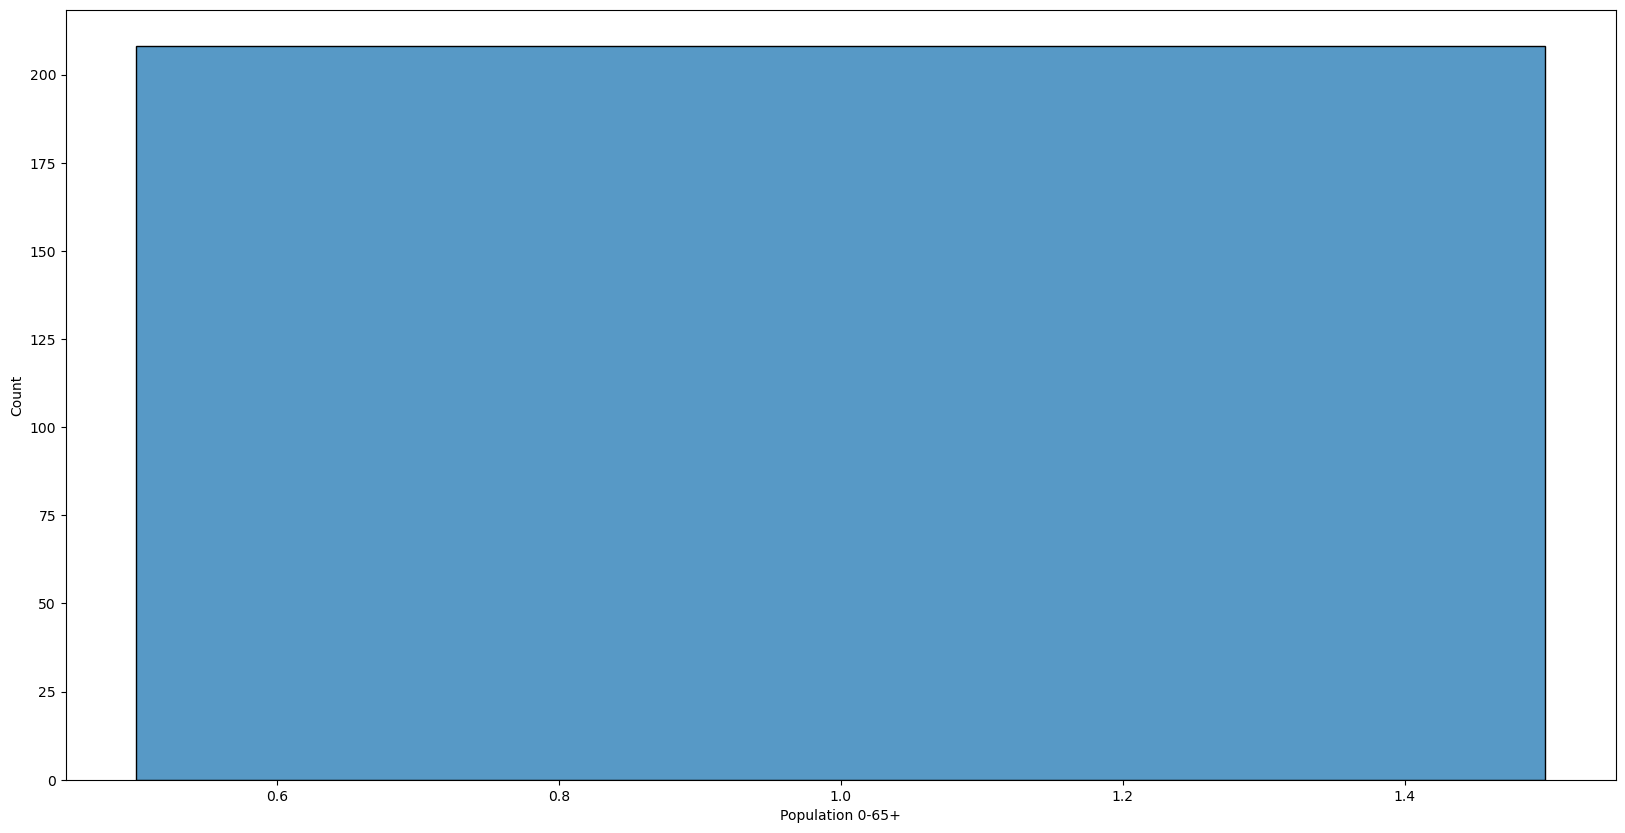

In [30]:
sns.histplot(new_df['Population 0-65+'])

In [31]:
# dropping Population 0-65+ 

In [32]:
new_df.drop('Population 0-65+',axis =1 , inplace = True)

In [33]:
pip install iso3166

Note: you may need to restart the kernel to use updated packages.


In [34]:
from iso3166 import countries

In [35]:
my_countries = new_df['Country']

In [36]:
all_countries = {}
for country in countries:
    all_countries[country.name] = country.alpha3

In [37]:
all_countries

{'Afghanistan': 'AFG',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia, Plurinational State of': 'BOL',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory': 'IOT',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cabo Verde': 'CPV',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 

In [38]:
code = [all_countries.get(countries) for countries in my_countries]
new_df['ISO Code'] = code 

In [39]:
new_df.set_index('Country',inplace=True)

In [40]:
new_df.head()

Birth Rate  Business Tax Rate  log10_CO2 Emissions  \
Country                                                              
Afghanistan       0.041187          37.790852             3.448751   
Albania           0.013827          41.728826             3.817068   
Algeria           0.022987          47.810756             5.041422   
American Samoa    0.019530          36.098327             2.615035   
Andorra           0.010333          39.574833             2.726592   

                Days to Start Business  Ease of Business  log10_Energy Usage  \
Country                                                                        
Afghanistan                  10.615147        173.820524            3.583827   
Albania                      20.217653        125.172350            3.418761   
Algeria                      25.228467        141.974156            4.560178   
American Samoa               17.000000         91.116532            1.486228   
Andorra                      23.195551         73.849854            3.223342   

                log10_GDP  Health Exp % GDP  log10_Health Exp/Capita  \
Country                                                                
Afghanistan      9.999324          0.089890                 1.498809   
Albania          9.992813          0.060867                 2.270471   
Algeria         11.116484          0.039893                 2.162147   
American Samoa   9.082155          0.084468                 3.093679   
Andorra          9.498402          0.065440                 3.416719   

                Hours to do Tax  Infant Mortality Rate  Internet Usage  \
Country                                                                  
Afghanistan          280.468712               0.079667        0.024170   
Albania              363.236058               0.016507        0.269333   
Algeria              444.727870               0.026107        0.092000   
American Samoa       128.000000               0.009431        0.524070   
Andorra               90.462126               0.002733        0.613925   

                Lending Interest  Life Expectancy Female  \
Country                                                    
Afghanistan             0.178447               59.560000   
Albania                 0.131067               79.626667   
Algeria                 0.080960               71.840000   
American Samoa          0.096368               73.710564   
Andorra                 0.069013               79.871419   

                Life Expectancy Male  Mobile Phone Usage  \
Country                                                    
Afghanistan                57.093333            0.317163   
Albania                    73.400000            0.700000   
Algeria                    68.626667            0.656000   
American Samoa             68.971383            0.129988   
Andorra                    74.308758            0.760000   

                log10_Population Total  Population Urban  \
Country                                                    
Afghanistan                   7.423713          0.238467   
Albania                       6.465061          0.495613   
Algeria                       7.551359          0.657200   
American Samoa                4.756518          0.878400   
Andorra                       4.893950          0.889933   

                log10_Tourism Inbound  log10_Tourism Outbound ISO Code  
Country                                                                 
Afghanistan                  7.904058                7.953794      AFG  
Albania                      9.104825                9.042931      ALB  
Algeria                      8.464706                8.692669      DZA  
American Samoa               8.356501                7.794127      ASM  
Andorra                      8.770406                8.381555      AND

In [41]:
# trying to understand data using describe function 
new_df.describe().T

count        mean         std        min         25%  \
Birth Rate               208.0    0.022146    0.010970   0.008200    0.012566   
Business Tax Rate        208.0   38.096600    9.141463  10.956066   33.722473   
log10_CO2 Emissions      208.0    3.910786    1.075542   1.797551    3.048263   
Days to Start Business   208.0   27.635544   13.086670   3.864206   18.019823   
Ease of Business         208.0  118.543814   35.534998  25.835926   90.046531   
log10_Energy Usage       208.0    3.718180    1.030178   1.295656    3.208259   
log10_GDP                208.0   10.285080    1.002027   8.096745    9.565166   
Health Exp % GDP         208.0    0.064984    0.024403   0.020067    0.048483   
log10_Health Exp/Capita  208.0    2.441560    0.751801   0.950071    1.815970   
Hours to do Tax          208.0  231.279300  102.223505  19.551056  155.467898   
Infant Mortality Rate    208.0    0.028645    0.027674   0.002133    0.006607   
Internet Usage           208.0    0.283725    0.248696   0.000000    0.062333   
Lending Interest         208.0    0.140149    0.097354   0.017000    0.078491   
Life Expectancy Female   208.0   72.007044   10.331982  43.706667   66.353333   
Life Expectancy Male     208.0   67.268556    9.048934  43.146667   62.166667   
Mobile Phone Usage       208.0    0.687293    0.371655   0.000000    0.358667   
log10_Population Total   208.0    6.618343    0.996656   4.452310    6.019827   
Population Urban         208.0    0.568723    0.245339   0.094773    0.364447   
log10_Tourism Inbound    208.0    8.801503    0.940726   6.300476    8.176161   
log10_Tourism Outbound   208.0    8.641895    0.973352   5.528763    8.010725   

                                50%         75%         max  
Birth Rate                 0.019073    0.028573    0.050693  
Business Tax Rate         38.290219   44.087949   58.628176  
log10_CO2 Emissions        3.861197    4.739817    6.769501  
Days to Start Business    24.938690   36.749625   67.136040  
Ease of Business         122.687433  145.789580  175.542252  
log10_Energy Usage         3.787626    4.406869    6.350133  
log10_GDP                 10.168664   11.039613   13.146919  
Health Exp % GDP           0.061627    0.077937    0.174587  
log10_Health Exp/Capita    2.446419    3.023812    3.871383  
Hours to do Tax          223.369045  296.366136  546.737216  
Infant Mortality Rate      0.017013    0.046720    0.120893  
Internet Usage             0.226667    0.472333    0.878667  
Lending Interest           0.116747    0.178505    1.012718  
Life Expectancy Female    75.904214   79.646667   85.786667  
Life Expectancy Male      69.573333   74.068659   80.720000  
Mobile Phone Usage         0.710823    0.956667    1.736000  
log10_Population Total     6.777533    7.306165    9.120829  
Population Urban           0.564620    0.769390    1.000000  
log10_Tourism Inbound      8.777491    9.504360   11.173365  
log10_Tourism Outbound     8.520737    9.291067   11.029390

In [42]:
new_df.shape

(208, 21)

we have 208 rows and 21 columns

As dimensionality increases sparsity ,computational complexity of the model increases which may lead to slower model with lower accuracy.

This is also called as curse of dimensionality¶

To avoid the curse of dimensionality we perform Principle component analysis to reduce the dimensions of the dataset without much loss of the information¶

Before PCA analysis we perform scaling to standardize the features in the dataset into a finite range

Note : we are applying StandardScaler here to center the data [mean to zera and std as 1] , instead of normalization to avoid possible skewness in the data¶

In [43]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(new_df.iloc[:,:-1])

In [44]:
scaled_df

array([[ 1.73984389, -0.03352704, -0.43061978, ..., -1.34937276,
        -0.956294  , -0.7086456 ],
       [-0.76020248,  0.39829392, -0.08734622, ..., -0.29871442,
         0.32321096,  0.41300907],
       [ 0.07680135,  1.06521152,  1.05375995, ...,  0.36150172,
        -0.35888285,  0.05228984],
       ...,
       [ 1.06488011,  0.56493287,  0.2233441 , ..., -1.08183241,
        -0.19246002, -0.37246864],
       [ 1.95914621, -2.29053779, -0.57990127, ..., -0.7820957 ,
        -0.78427865, -0.61988914],
       [ 0.90040337, -0.2239221 , -0.06463895, ..., -0.95108575,
        -0.31512205, -0.56429527]])

In [45]:
# PCA analysis
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=20)
pca_val = pca.fit_transform(scaled_df)

In [47]:
# The amount of variance that each PCA explains is 
variance = pca.explained_variance_ratio_
variance

array([4.69520085e-01, 2.20591095e-01, 6.29890917e-02, 5.57408614e-02,
       3.47180649e-02, 3.33380332e-02, 2.99837842e-02, 2.58185548e-02,
       1.98871396e-02, 1.14827993e-02, 9.12272583e-03, 8.09135692e-03,
       5.58303144e-03, 3.99099305e-03, 3.10229638e-03, 2.51013900e-03,
       1.56032532e-03, 1.11763030e-03, 7.10577224e-04, 1.41415349e-04])

In [48]:
cumulative_variance = np.cumsum(np.round(variance,7)*100)
cumulative_variance

array([ 46.95201,  69.01112,  75.31003,  80.88412,  84.35593,  87.68973,
        90.68811,  93.26997,  95.25868,  96.40696,  97.31923,  98.12837,
        98.68667,  99.08577,  99.396  ,  99.64701,  99.80304,  99.9148 ,
        99.98586, 100.     ])

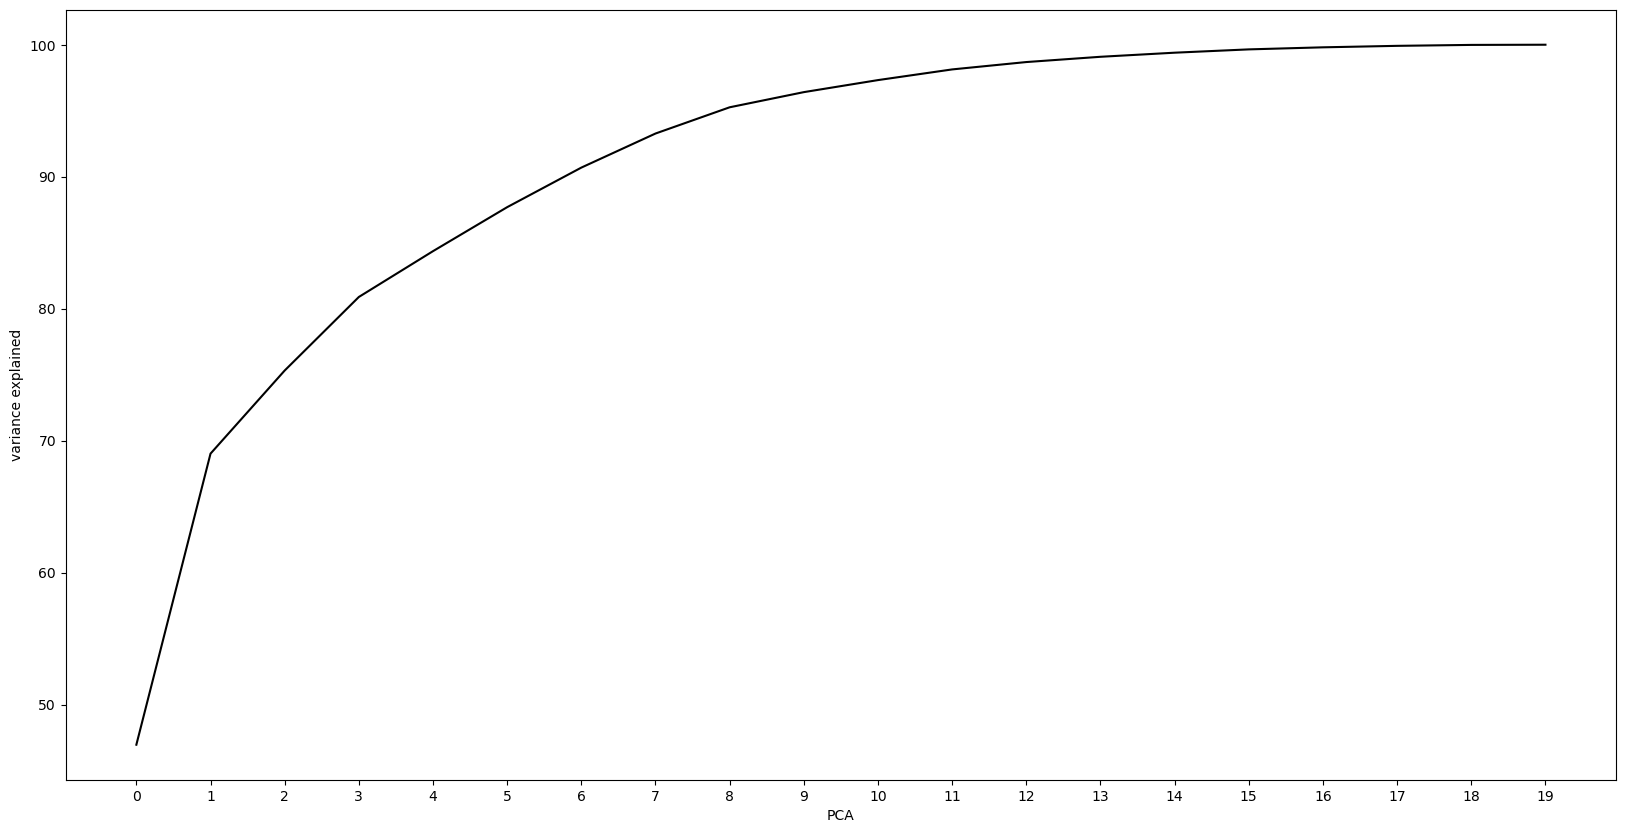

In [49]:
plt.plot(cumulative_variance,c = 'black')
plt.xlabel('PCA')
plt.xticks(np.arange(0,20))
plt.ylabel('variance explained')
plt.show()

In [50]:
pca_df = pd.DataFrame(pca_val[:,:7],columns=['pc1','pc2','pc3','pc4','PCA5','PCA6','PCA7'])

In [51]:
pca_df.head()

pc1       pc2       pc3       pc4      PCA5      PCA6      PCA7
0  3.774569  1.039330  1.475236  1.503053 -0.891486 -0.977155  0.147251
1 -0.592435  0.015587  0.265177 -1.222115 -0.391333 -1.092343  0.792549
2  0.150335  2.249166 -0.060057 -1.735823 -0.327979 -0.925475 -0.020887
3 -0.284406 -3.890271  1.028085  0.564203 -0.003791  0.405315 -0.115843
4 -2.291212 -3.244484  0.157415 -0.068129  0.455054  0.449931 -0.679277

although fundamentally PCA is a dimensionality reduction technique it is also used for visualizations

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

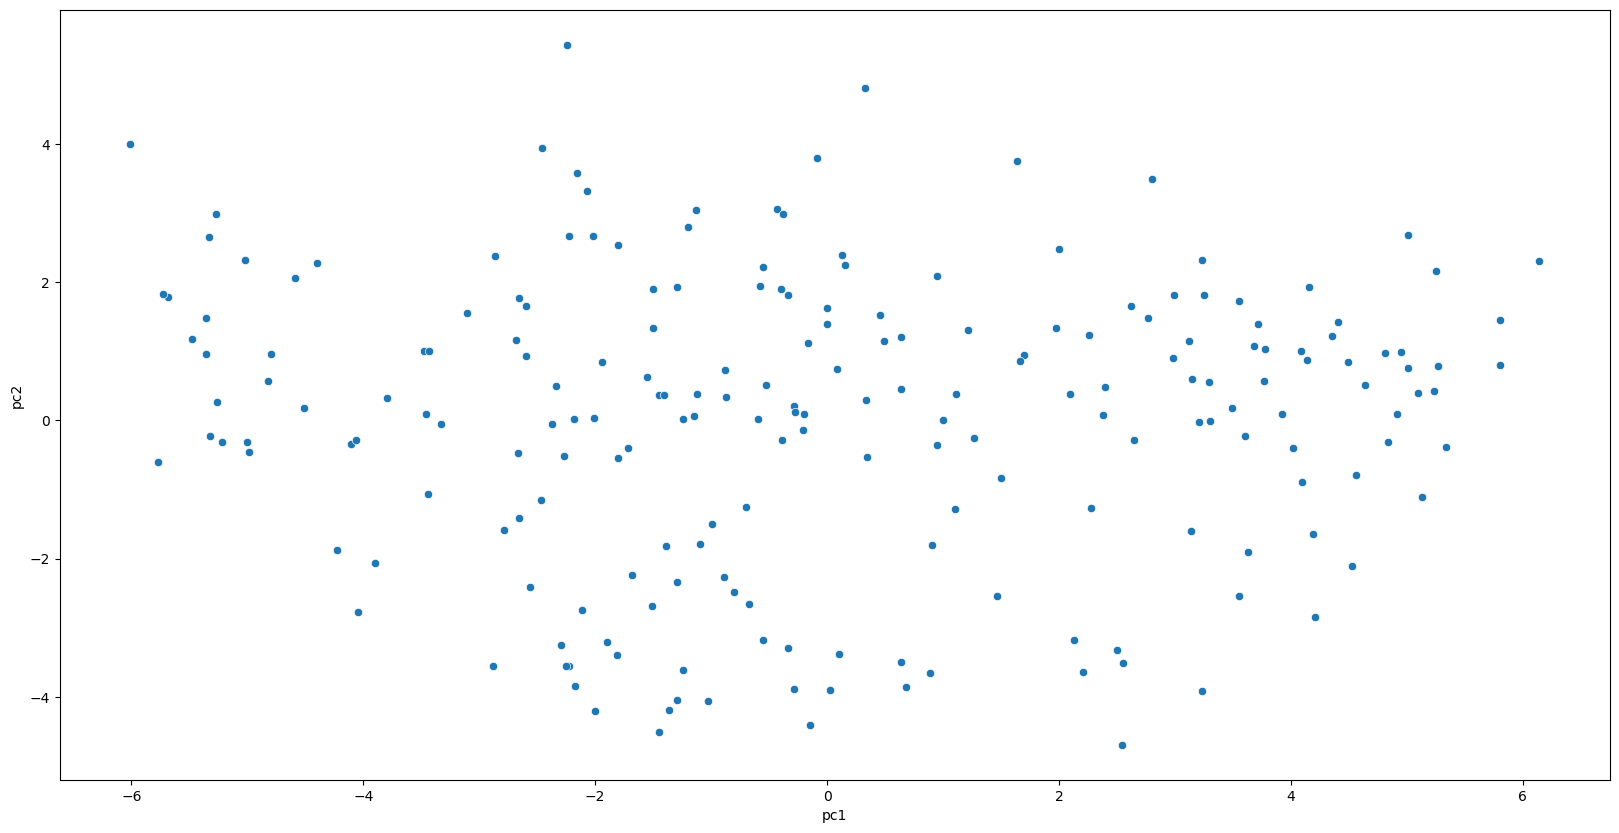

In [52]:
sns.scatterplot(pca_df['pc1'],pca_df['pc2'])

let's apply aglomerative and kmeans clustering

# dendrogram

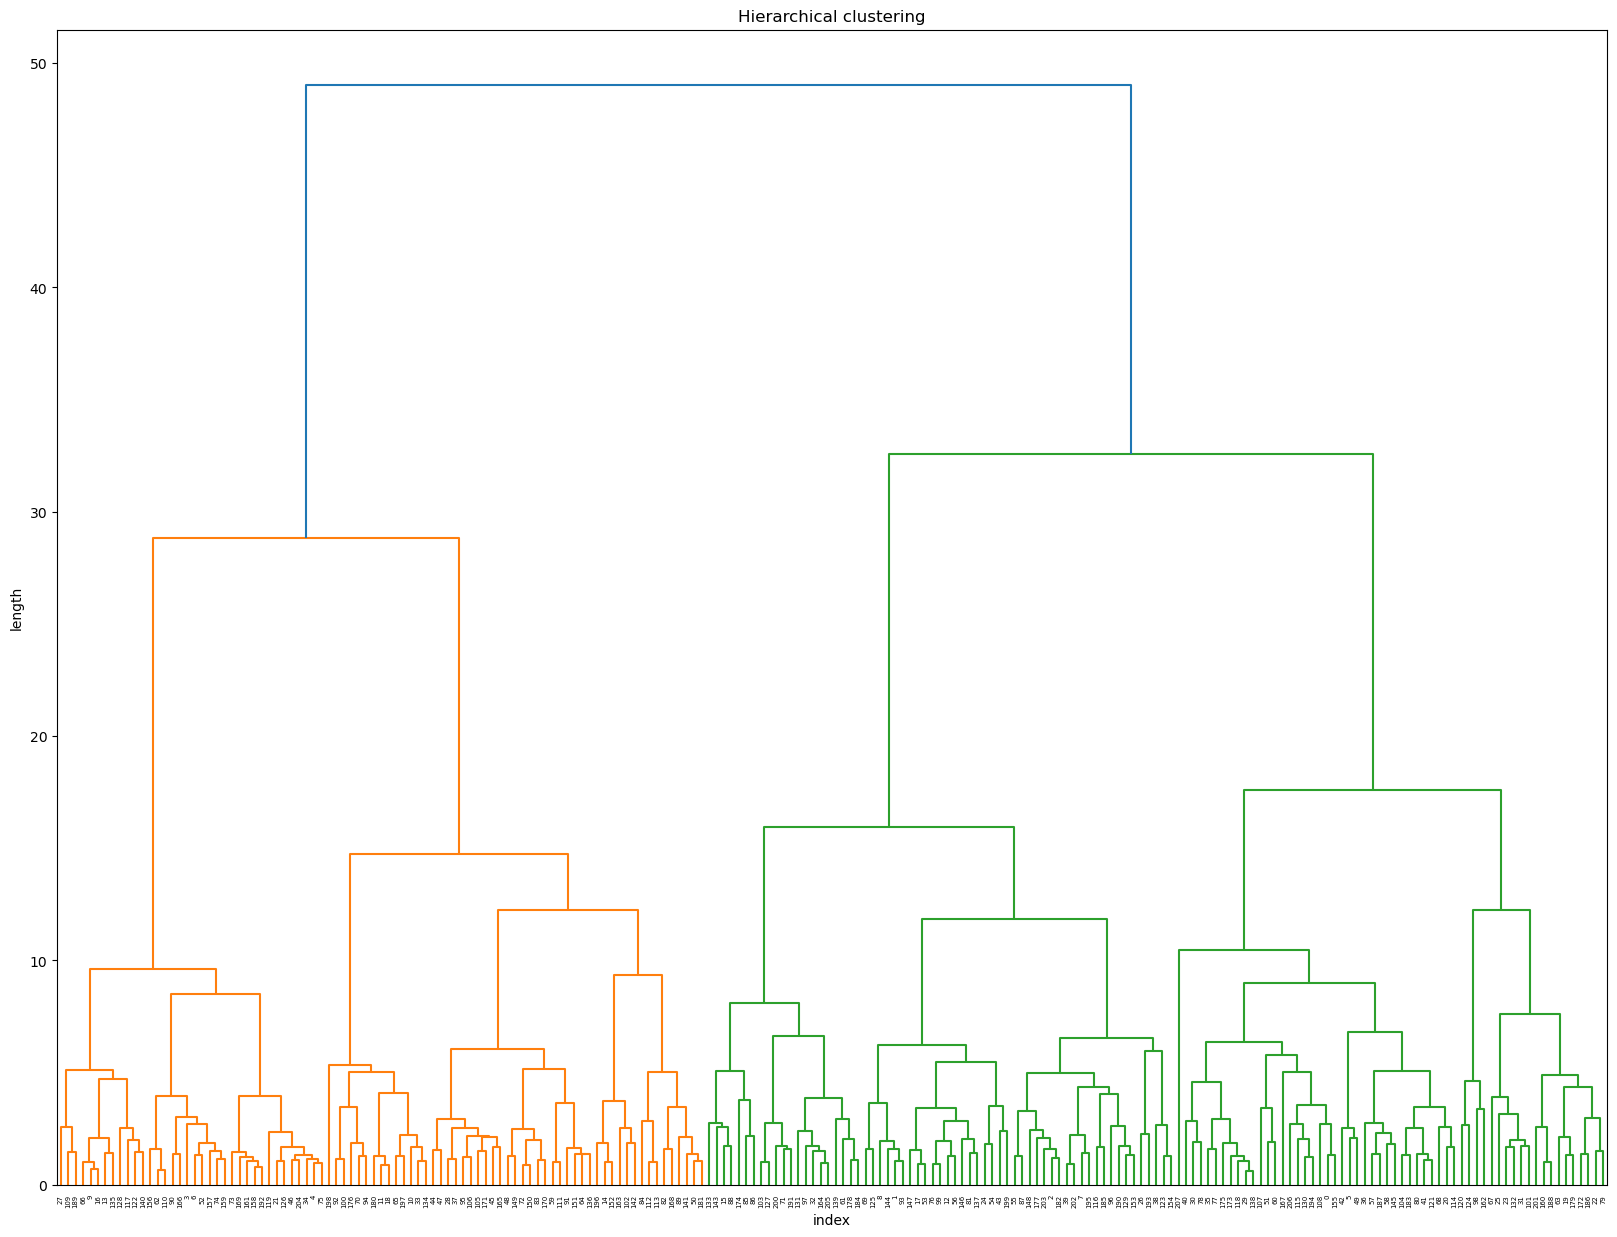

In [53]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(pca_df,method='ward',metric='euclidean')
plt.figure(figsize=(20,15))
plt.title('Hierarchical clustering')
plt.xlabel('index')
plt.ylabel('length')
sch.dendrogram(z)
plt.show()

# AgglomerativeClustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
h_cluster= AgglomerativeClustering(n_clusters=4,linkage='ward',affinity='euclidean').fit(pca_df)
h_cluster_labels = pd.Series(h_cluster.labels_)

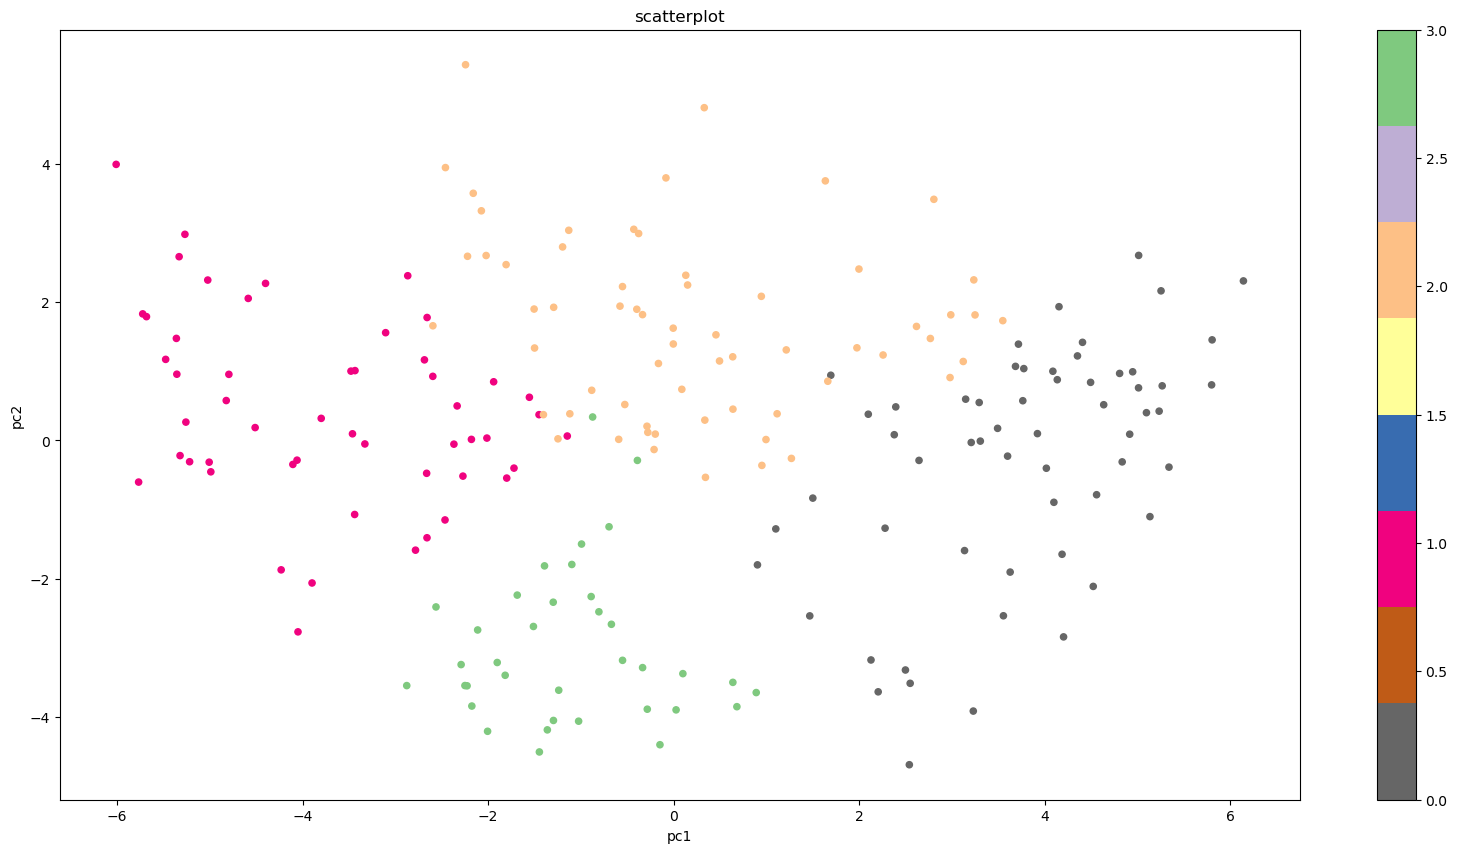

In [55]:
pca_df.plot(x='pc1',y='pc2',c=h_cluster_labels,kind='scatter',cmap=plt.cm.Accent_r)
plt.title('scatterplot')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# silhouette score for agglomerative clustering:

In [56]:
from sklearn.metrics import silhouette_score
silhotte_h=silhouette_score(pca_df,h_cluster_labels)
silhotte_h

0.24480859129486154

# KMeans clustering¶

finding optimal k value using elbow curve

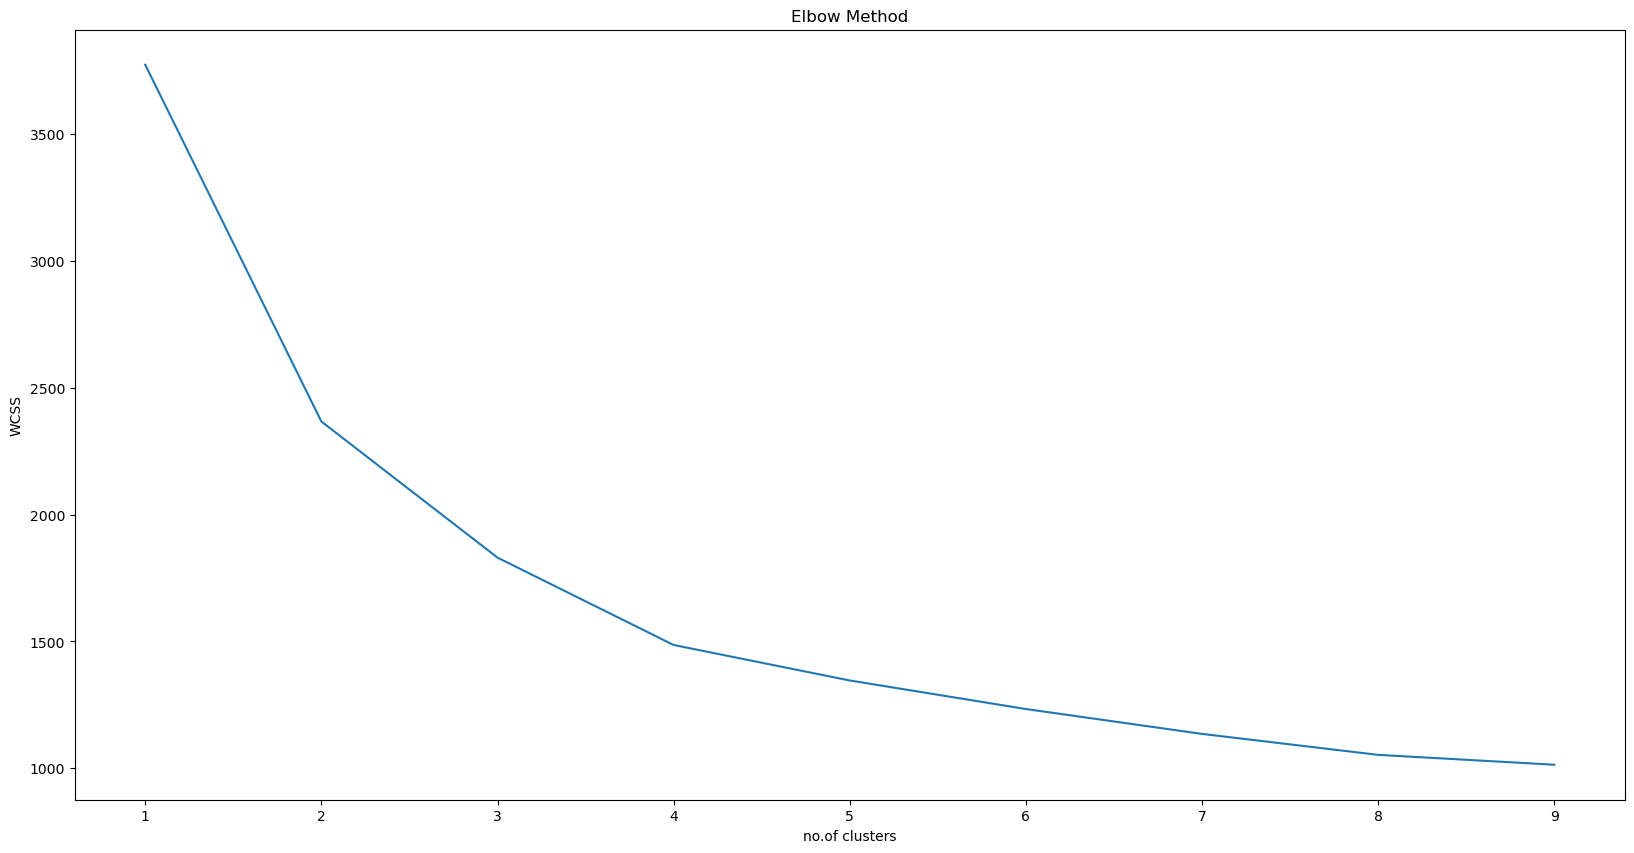

In [57]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    k = KMeans(n_clusters=i).fit(pca_df)
    WCSS.append(k.inertia_)
plt.plot(range(1,10),WCSS)
plt.title('Elbow Method')
plt.xlabel('no.of clusters')
plt.ylabel('WCSS')
plt.show() 

In [58]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=4,init='k-means++',random_state=49).fit(pca_df)
k_labels= k.labels_

<Figure size 1000x800 with 0 Axes>

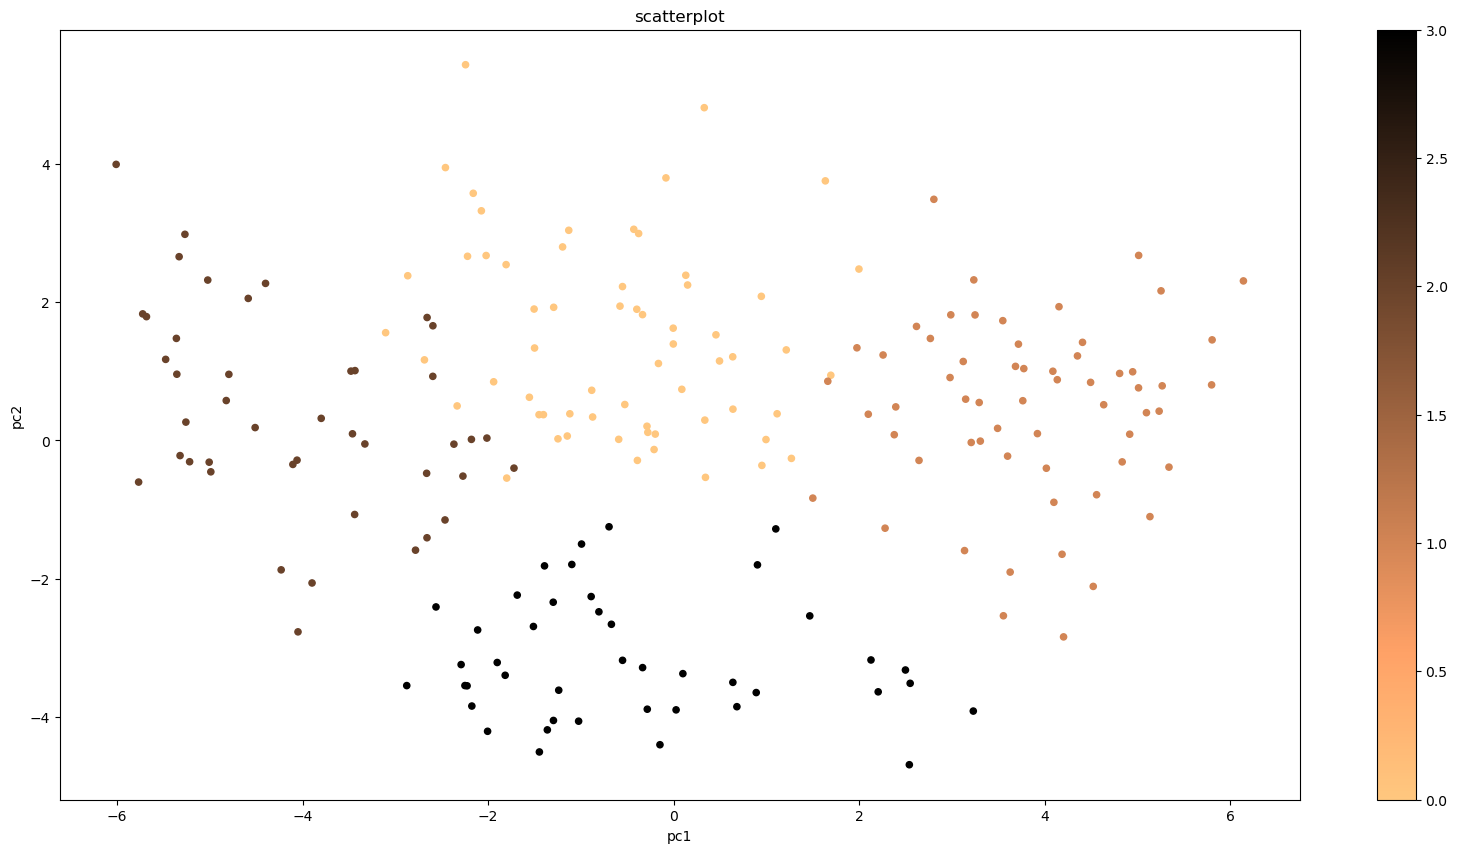

In [59]:
plt.figure(figsize=(10,8))
pca_df.plot(x='pc1',y='pc2',c=k_labels,kind='scatter',cmap=plt.cm.copper_r)
plt.title('scatterplot')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

silhouette score for kmeans clustering

In [60]:
from sklearn.metrics import silhouette_score
score = silhouette_score(pca_df,k_labels)
score

0.29753917594593415

In [61]:
new_df['cluster_label'] = k_labels

In [62]:
new_df

Birth Rate  \
Country                                                          
Afghanistan                                           0.041187   
Albania                                               0.013827   
Algeria                                               0.022987   
American Samoa                                        0.019530   
Andorra                                               0.010333   
Angola                                                0.047640   
Antigua and Barbuda                                   0.017907   
Argentina                                             0.017373   
Armenia                                               0.013920   
Aruba                                                 0.011573   
Australia                                             0.013573   
Austria                                               0.009253   
Azerbaijan                                            0.017307   
Bahamas                                               0.015493   
Bahrain                                               0.017560   
Bangladesh                                            0.022213   
Barbados                                              0.013000   
Belarus                                               0.010600   
Belgium                                               0.011600   
Belize                                                0.025560   
Benin                                                 0.038960   
Bermuda                                               0.012560   
Bhutan                                                0.021960   
Bolivia, Plurinational State of                       0.027560   
Bosnia and Herzegovina                                0.008627   
Botswana                                              0.024893   
Brazil                                                0.016787   
Brunei Darussalam                                     0.018173   
Bulgaria                                              0.009827   
Burkina Faso                                          0.043547   
Burundi                                               0.044307   
Cambodia                                              0.026093   
Cameroon                                              0.039413   
Canada                                                0.011000   
Cayman Islands                                        0.014992   
Central African Republic                              0.036067   
Chad                                                  0.048347   
Chile                                                 0.014693   
China                                                 0.012093   
Colombia                                              0.020453   
Comoros                                               0.037867   
Congo                                                 0.038760   
Congo, Democratic Republic of the                     0.044933   
Costa Rica                                            0.016653   
Croatia                                               0.009640   
Cuba                                                  0.010693   
Curaçao                                               0.014157   
Cyprus                                                0.012080   
Czechia                                               0.010360   
Côte d'Ivoire                                         0.036707   
Denmark                                               0.011440   
Djibouti                                              0.028693   
Dominica                                              0.015776   
Dominican Republic                                    0.022747   
Ecuador                                               0.022573   
Egypt                                                 0.024040   
El Salvador                                           0.020920   
Equatorial Guinea                                     0.037307   
Eritrea                                               0.038987   
Estonia                   

In [63]:
cluster_0 = new_df[new_df['cluster_label']==0]
cluster_0.index

Index(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Bolivia, Plurinational State of',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'China', 'Colombia',
       'Costa Rica', 'Cuba', 'Czechia', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Georgia', 'Guatemala', 'Honduras', 'Hungary',
       'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Korea, Democratic People's Republic of',
       'Kyrgyzstan', 'Latvia', 'Libya', 'Mexico', 'Moldova, Republic of',
       'Mongolia', 'Morocco', 'Nicaragua', 'Pakistan', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation',
       'Serbia', 'Slovakia', 'South Africa', 'Sri Lanka',
       'Syrian Arab Republic', 'Thailand', 'Trinidad and Tobago', 'Tunisia',
       'Türkiye', 'Ukraine', 'Uruguay', 'Uzbekistan',
       'Venezuela, Bolivarian Republic of', 'Viet Nam'],
      dtype='object

In [64]:
cluster_1 = new_df[new_df['cluster_label']==1]
cluster_1.index


Index(['Afghanistan', 'Angola', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo', 'Congo, Democratic Republic of the',
       'Côte d'Ivoire', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Kenya', 'Kosovo',
       'Lao People's Democratic Republic', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Niger', 'Nigeria', 'Papua New Guinea', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'Somalia', 'South Sudan', 'Sudan', 'Tajikistan',
       'Tanzania, United Republic of', 'Timor-Leste', 'Togo', 'Turkmenistan',
       'Uganda', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country')

In [65]:
cluster_2 = new_df[new_df['cluster_label']==2]
cluster_2.index

Index(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Chile',
       'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Korea, Republic of', 'Kuwait', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Macao', 'Malaysia', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Portugal', 'Puerto Rico', 'Qatar',
       'Saudi Arabia', 'Singapore', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'],
      dtype='object', name='Country')

In [66]:
cluster_3 = new_df[new_df['cluster_label']==3]
cluster_3.index

Index(['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bermuda', 'Brunei Darussalam', 'Cayman Islands',
       'Curaçao', 'Dominica', 'Faroe Islands', 'Fiji', 'French Polynesia',
       'Greenland', 'Grenada', 'Guam', 'Isle of Man', 'Kiribati',
       'Liechtenstein', 'Maldives', 'Malta', 'Marshall Islands', 'Mauritius',
       'Micronesia, Federated States of', 'Monaco', 'Montenegro',
       'New Caledonia', 'North Macedonia', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Martin (French part)',
       'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Seychelles',
       'Sint Maarten (Dutch part)', 'Suriname', 'Tonga',
       'Turks and Caicos Islands', 'Vanuatu', 'Virgin Islands, U.S.'],
      dtype='object', name='Country')

In [67]:
import plotly.express as px

In [68]:
figure = px.choropleth(new_df , locations=new_df.index ,locationmode='country names',projection='wagner4',labels='cluster_label',color='cluster_label',hover_name=new_df.index,hover_data=['cluster_label','ISO Code'])
figure.show()

In [69]:
new_df.to_csv('Countries.csv')